# DBSCAN 실습

[목적]
  - 비지도학습 중 하나인 Clustering 중 DBSCAN 실습
  - For loop 활용 Hyperparameter(2개) 변경시켜 가며 실습 진행
  
[Process]
  1. Define X's
  2. Modeling

In [1]:
# warning 무시
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pylab as plt
# '-' 깨짐 해결 모듈
import matplotlib as mpl

plt.rcParams["font.family"] = "Malgun Gothic"  # For Windows
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (8,4)
print(plt.rcParams["font.family"])

# 마이너스 깨짐 해결
mpl.rcParams["axes.unicode_minus"] = False

['Malgun Gothic']


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets as data
from sklearn.cluster import DBSCAN

In [3]:
#plt 와 sns Setting
%matplotlib inline
sns.set_context('poster')
sns.set_style('white')
sns.set_color_codes()
# **plot_kwds : 호출 (**)해서 부르면 아래가 언팩 (unpack) 되어서 반영됨 -> 큰 테두리를 벗기고 낱개로 입력함
# plt.scatter()에 각각의 인자를 나열해서 입력한것과 동일
# alpha : 투명도, s : 각 요소 점의 시각적 크기 (default : 1/72 inch^2)
plot_kwds = {'alpha' : 0.5, 's' : 80, 'linewidths':0}
plt.rcParams["figure.figsize"] = [9,7]

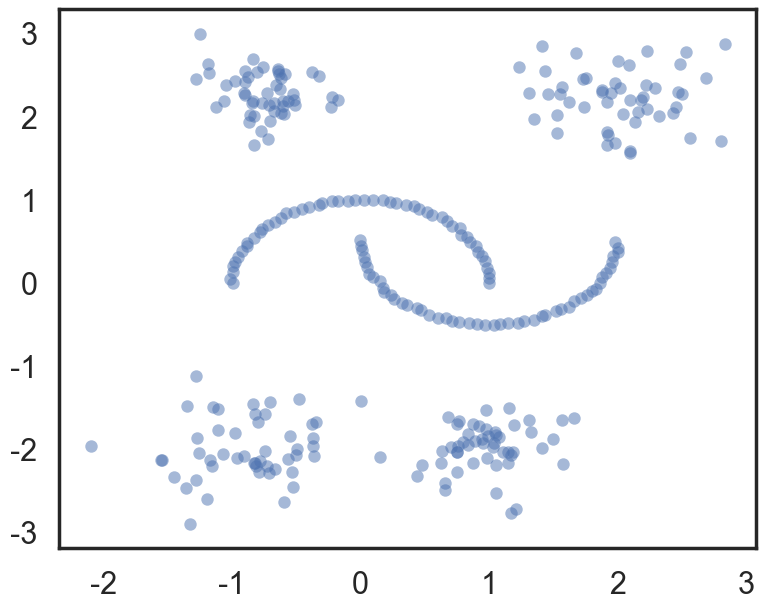

In [4]:
# Sample Data 만들기
num=100
moons, _ = data.make_moons(n_samples=num, noise=0.01)
blobs, _ = data.make_blobs(n_samples=num, centers=[(-0.75,2.25), (1.0, -2.0)], cluster_std=0.25)
blobs2, _ = data.make_blobs(n_samples=num, centers=[(2,2.25), (-1, -2.0)], cluster_std=0.4)

test_data = np.vstack([moons, blobs,blobs2])
plt.scatter(test_data.T[0], test_data.T[1], color='b', **plot_kwds)
plt.show()

[DBSCAN]
  - Hyperparameter Tuning using for Loop

[DBSCAN Parameters]
  - Packge : https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html
  - eps : 이웃을 판단하는 거리
  - metric : 거리를 계산할 때 사용하는 방법
    - default : euclidean
  - min_samples : eps안에 적어도 몇개 들어와야 하는지 이웃의 숫자

epsilon : 0.1, minPls : 5


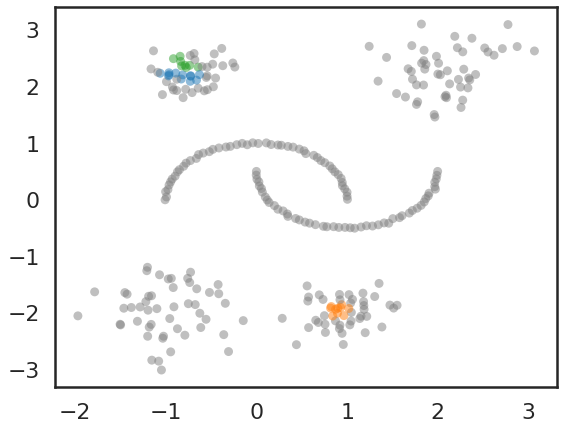

epsilon : 0.1, minPls : 10


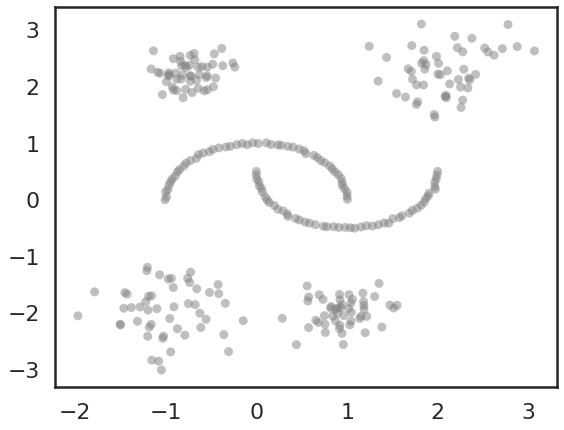

epsilon : 0.1, minPls : 15


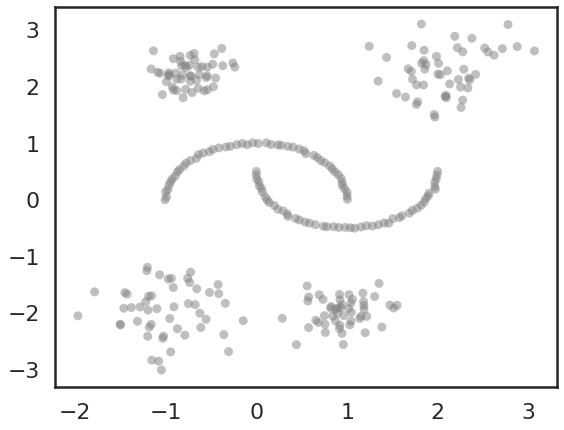

epsilon : 0.1, minPls : 20


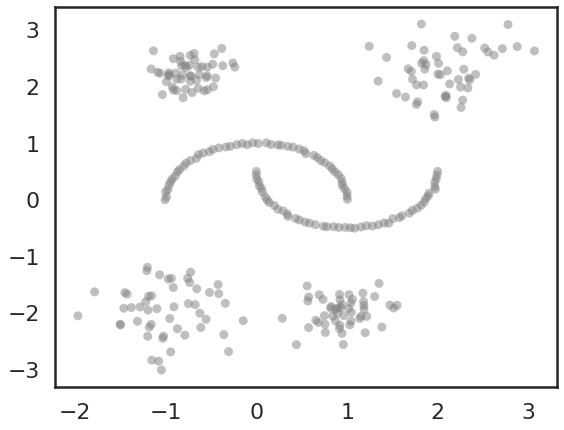

epsilon : 0.2, minPls : 5


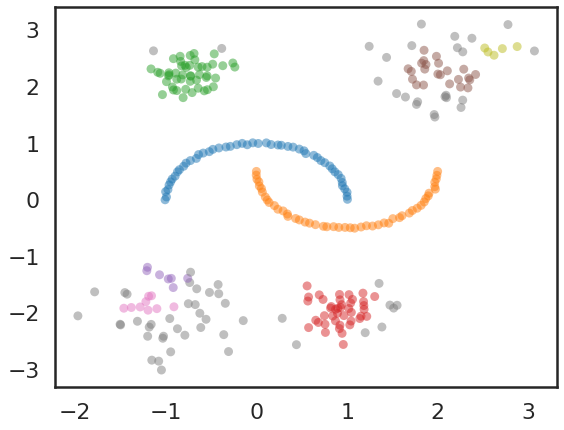

epsilon : 0.2, minPls : 10


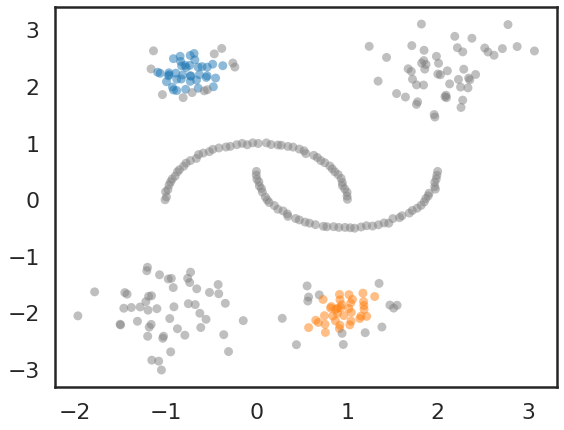

epsilon : 0.2, minPls : 15


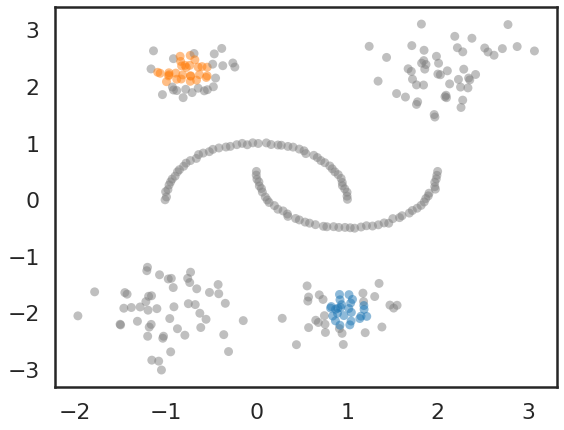

epsilon : 0.2, minPls : 20


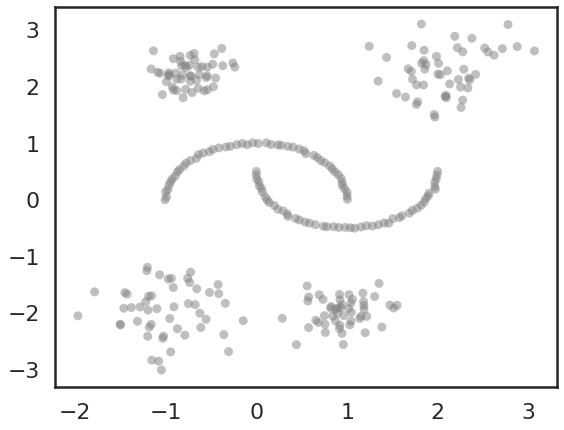

epsilon : 0.3, minPls : 5


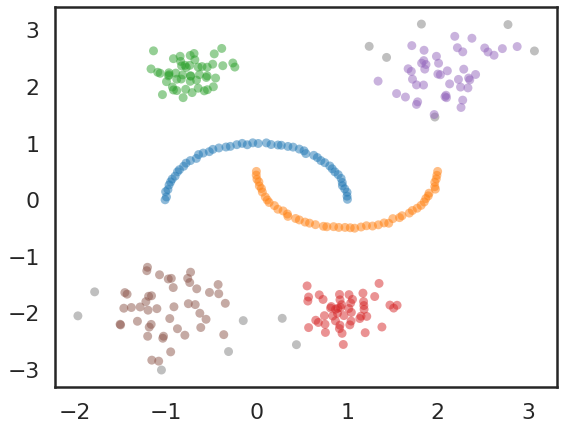

epsilon : 0.3, minPls : 10


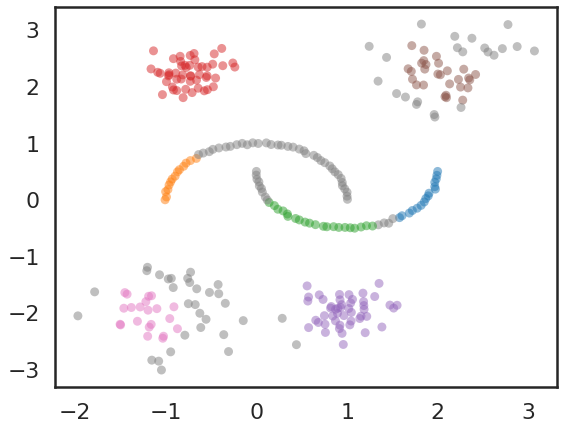

epsilon : 0.3, minPls : 15


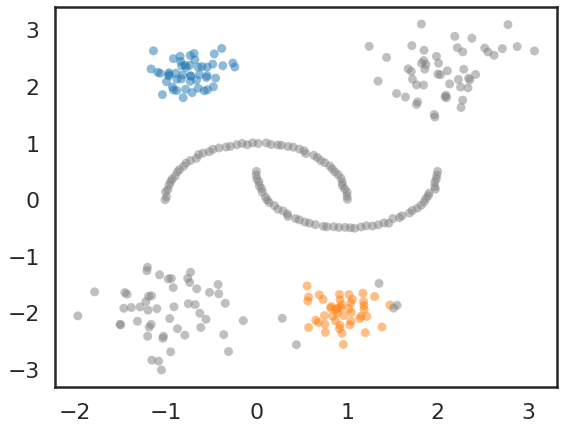

epsilon : 0.3, minPls : 20


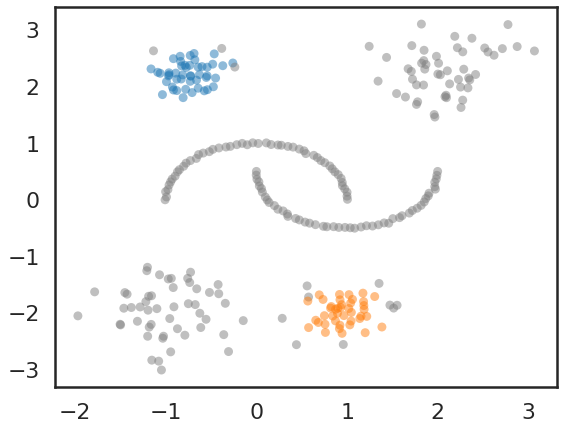

epsilon : 0.4, minPls : 5


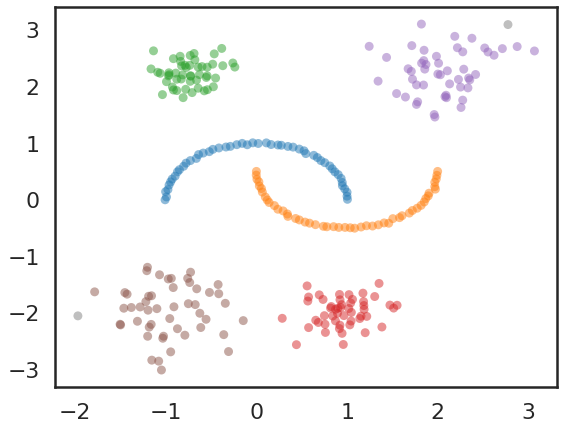

epsilon : 0.4, minPls : 10


epsilon : 0.4, minPls : 15


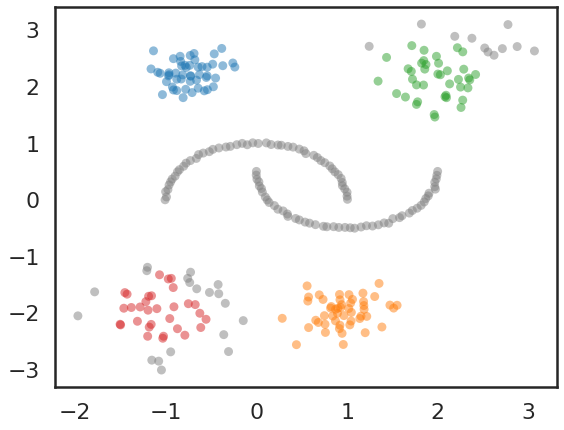

epsilon : 0.4, minPls : 20


epsilon : 0.5, minPls : 5


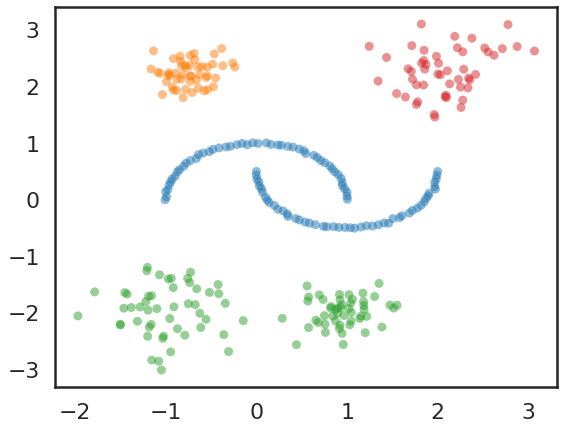

epsilon : 0.5, minPls : 10


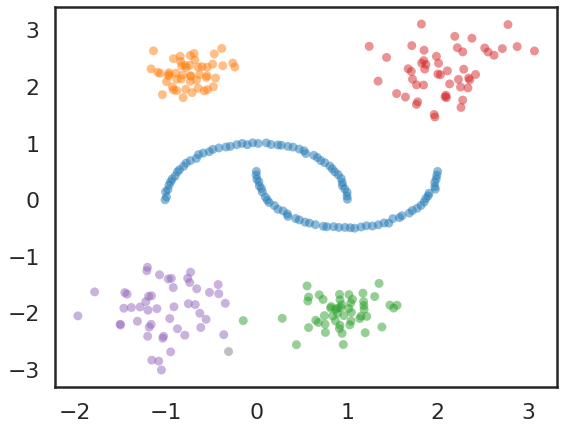

epsilon : 0.5, minPls : 15


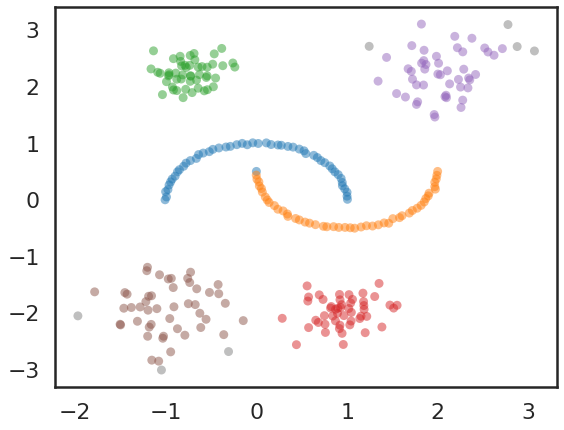

epsilon : 0.5, minPls : 20


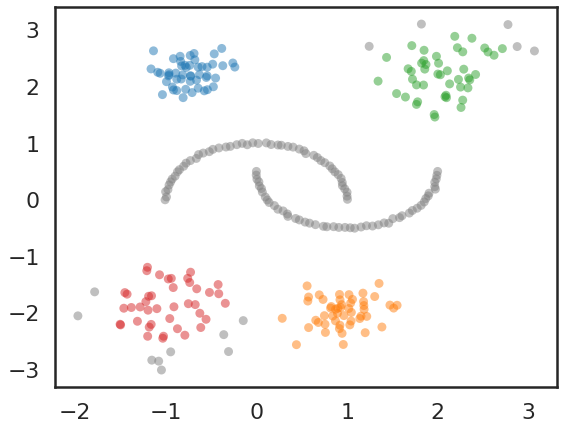

epsilon : 0.6, minPls : 5


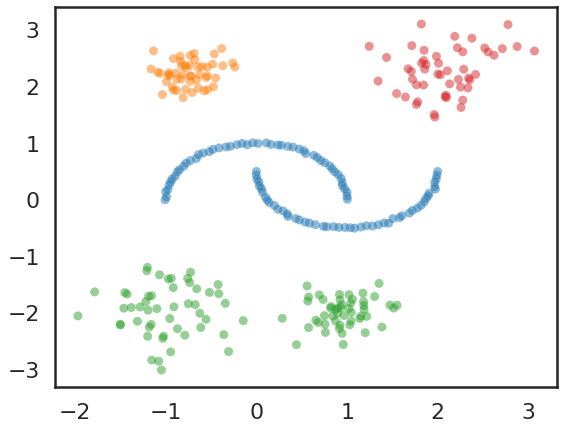

epsilon : 0.6, minPls : 10


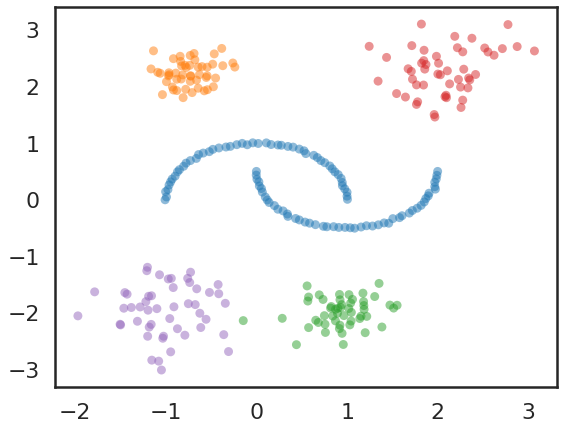

epsilon : 0.6, minPls : 15


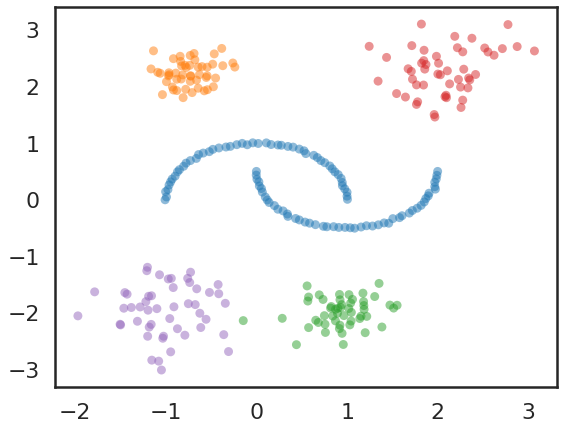

epsilon : 0.6, minPls : 20


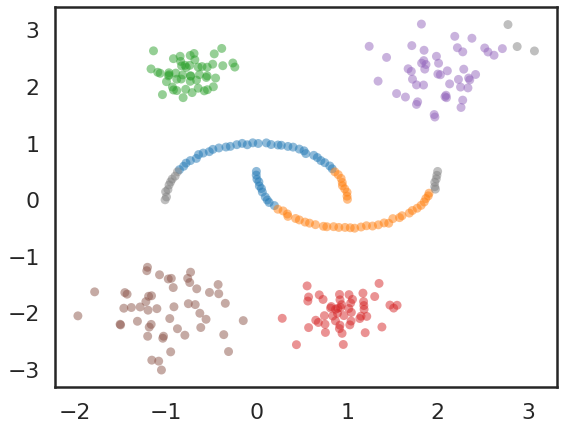

epsilon : 0.7, minPls : 5


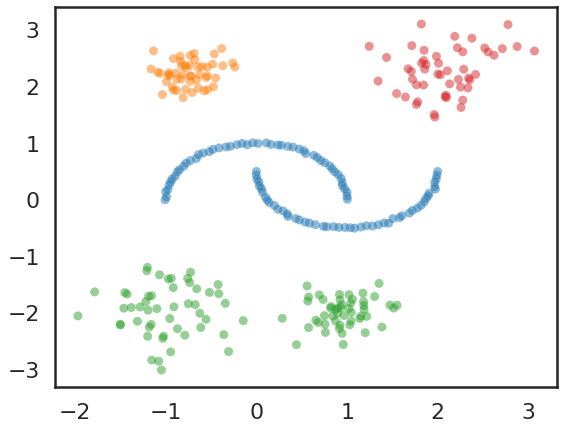

epsilon : 0.7, minPls : 10


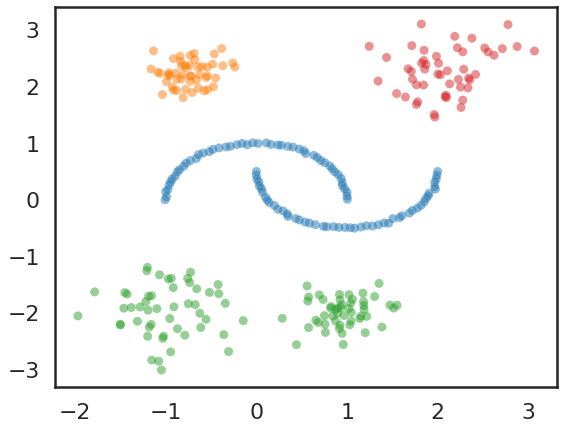

epsilon : 0.7, minPls : 15


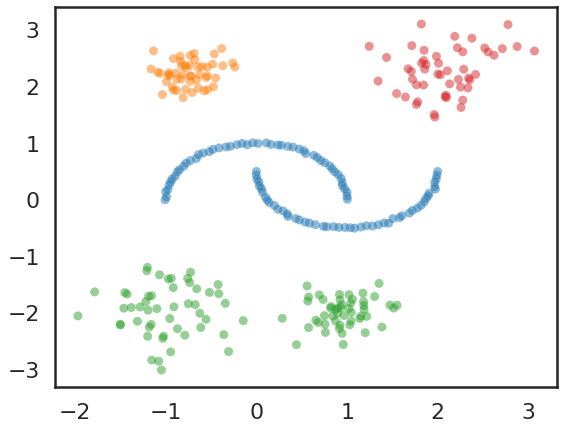

epsilon : 0.7, minPls : 20


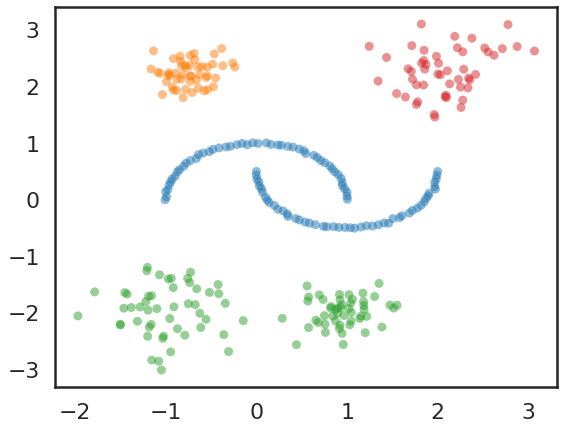

In [8]:
# 가장 적절한 epsilon, minpoints 값을 찾기 위한 시각적 분석
epsilon = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]
minPls = [5, 10, 15, 20]

for e in epsilon:
    for m in minPls:
        print("epsilon : {}, minPls : {}".format(e, m))
        db = DBSCAN(eps=e, min_samples=m).fit(test_data)
        palette = sns.color_palette()
        # db.labels_ 값 각각을 col에 입력한 후, 그 입력한 값을 palette[]에 입력해 색깔을 부여한다
        cluster_colors = [palette[col]
                        if col >= 0 else (0.5, 0.5, 0.5) for col in
                        db.labels_]
        plt.scatter(test_data.T[0], test_data.T[1], c=cluster_colors, **plot_kwds)
        plt.show()